In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-performance-in-exams/StudentsPerformance.csv
/kaggle/input/healthy-lifestyle-cities-report-2021/healthy_lifestyle_city_2021.csv
/kaggle/input/spotify-top-50-songs-in-2021/spotify_top50_2021.csv


In [2]:
import numpy as np
import pandas as pd



data= pd.read_csv('/kaggle/input/students-performance-in-exams/StudentsPerformance.csv')
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [3]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [4]:
data['math_score']=data['math score']
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72
1,female,group C,some college,standard,completed,69,90,88,69
2,female,group B,master's degree,standard,none,90,95,93,90
3,male,group A,associate's degree,free/reduced,none,47,57,44,47
4,male,group C,some college,standard,none,76,78,75,76
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,88
996,male,group C,high school,free/reduced,none,62,55,55,62
997,female,group C,high school,free/reduced,completed,59,71,65,59
998,female,group D,some college,standard,completed,68,78,77,68


In [5]:
data.drop(columns=['math score'],inplace=True)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='math_score', ylabel='Density'>

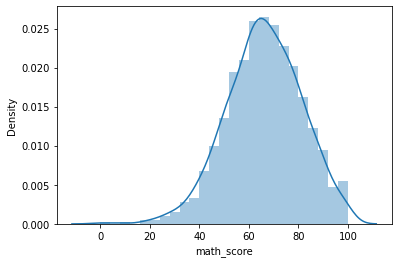

In [6]:
import seaborn as sns
sns.distplot(data.iloc[:,7])

In [7]:
data.iloc[:,7].mean()

66.089

In [8]:
data.iloc[:,7].std()

15.163080096009468

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='math_score', ylabel='Density'>

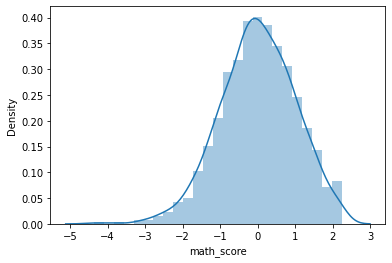

In [9]:
from sklearn.preprocessing import StandardScaler
s= StandardScaler()
data['math_score']= s.fit_transform(data[['math_score']])
sns.distplot(data.math_score)


In [10]:
data.iloc[:,7].mean()

9.303668946358811e-17

In [11]:
data.iloc[:,7].std()

1.0005003753127728

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='math_score', ylabel='Density'>

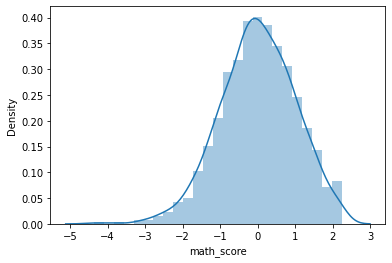

In [12]:
sns.distplot(data.math_score)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='math_score', ylabel='Density'>

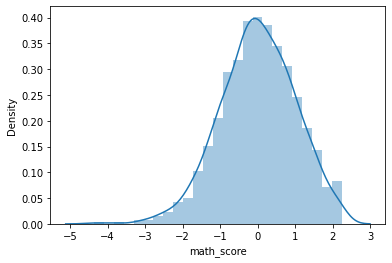

In [13]:
import seaborn as sns
sns.distplot(data.iloc[:,7])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='math_score', ylabel='Density'>

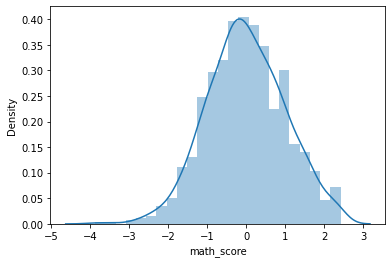

In [14]:
from sklearn.preprocessing import PowerTransformer
p= PowerTransformer()
data['math_score']= p.fit_transform(data[['math_score']])
sns.distplot(data.math_score)


In [15]:
data.iloc[:,7].unique

<bound method Series.unique of 0      0.355096
1      0.149656
2      1.656185
3     -1.237294
4      0.634911
         ...   
995    1.506877
996   -0.312114
997   -0.502990
998    0.082120
999    0.705813
Name: math_score, Length: 1000, dtype: float64>

In [16]:
nomi_col=[1,2,3]
ordinal_col=[0,4]
num_col=[5,6]

In [17]:
x=data.iloc[:,0:7]
x

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95
996,male,group C,high school,free/reduced,none,55,55
997,female,group C,high school,free/reduced,completed,71,65
998,female,group D,some college,standard,completed,78,77


In [18]:
y=data[['math_score']]
y

,math_score
0,0.355096
1,0.149656
2,1.656185
3,-1.237294
4,0.634911
...,...
995,1.506877
996,-0.312114
997,-0.502990
998,0.082120


In [19]:
from sklearn.preprocessing import PowerTransformer, OneHotEncoder, OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn import set_config
trans = make_column_transformer ((OneHotEncoder(sparse=True),nomi_col),
                                (OrdinalEncoder(),ordinal_col),
                                (PowerTransformer(),num_col),
                                 remainder= 'passthrough')
set_config(display='diagram')
trans

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder', OneHotEncoder(), [1, 2, 3]),
                                ('ordinalencoder', OrdinalEncoder(), [0, 4]),
                                ('powertransformer', PowerTransformer(),
                                 [5, 6])])

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split (x,y,test_size=0.3)

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
model = LinearRegression()
pipe= make_pipeline(trans,model)

In [22]:
model

LinearRegression()

In [23]:
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(), [1, 2, 3]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [0, 4]),
                                                 ('powertransformer',
                                                  PowerTransformer(),
                                                  [5, 6])])),
                ('linearregression', LinearRegression())])

In [24]:
pipe.fit(x_test,y_test)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(), [1, 2, 3]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [0, 4]),
                                                 ('powertransformer',
                                                  PowerTransformer(),
                                                  [5, 6])])),
                ('linearregression', LinearRegression())])

In [25]:
pred= pipe.predict(x_test)
pred

array([[-0.08142003],
       [-0.7729761 ],
       [ 0.16431919],
       [-0.24211058],
       [-0.27163871],
       [-0.58896876],
       [-1.34905731],
       [ 1.3282604 ],
       [-0.94193915],
       [ 0.41608513],
       [-1.77886236],
       [-1.08389874],
       [-0.86028401],
       [-0.50304377],
       [-2.62051249],
       [ 0.26672548],
       [-0.03578694],
       [ 0.71665607],
       [ 0.9111796 ],
       [ 1.19708072],
       [ 1.25266522],
       [-2.35428688],
       [-0.35217926],
       [ 0.43860109],
       [ 0.22418004],
       [-0.10359679],
       [ 1.87353228],
       [ 0.54984697],
       [-1.03370469],
       [ 0.96586467],
       [ 1.41091631],
       [ 0.49060113],
       [ 0.52054623],
       [ 0.67217344],
       [ 0.94479947],
       [-1.19987269],
       [-0.02542015],
       [-0.02958691],
       [-0.4335913 ],
       [-0.96243218],
       [-0.82152667],
       [ 0.67578924],
       [ 0.4645576 ],
       [ 1.28750213],
       [-0.41281971],
       [ 0

In [26]:
from sklearn.metrics import mean_squared_error
mean_squared_error(pred,y_test)

0.12289852222396443

In [27]:
model.coef_

array([[-0.08868883, -0.01484672, -0.07994214, -0.07612248,  0.25960017,
         0.02547331, -0.12097891,  0.07402387, -0.19236229,  0.09093226,
         0.12291176, -0.09733011,  0.09733011,  0.86123008,  0.23753886,
         0.16851331,  0.81796688]])

In [28]:
model.intercept_

array([-0.5234877])